In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# useful functions
def create_mohr_circle(sigma1, sigma3, center_x=None, center_y=0):
    """Create a Mohr circle given principal stresses"""
    if center_x is None:
        center_x = (sigma1 + sigma3) / 2
    radius = (sigma1 - sigma3) / 2
    
    # Create circle points
    theta = np.linspace(0, 2*np.pi, 100)
    x = center_x + radius * np.cos(theta)
    y = center_y + radius * np.sin(theta)
    
    return x, y

def create_failure_envelope(sigma_range, cohesion, friction_angle):
    """Create Mohr-Coulomb failure envelope"""
    phi_rad = np.radians(friction_angle)
    tau = cohesion + sigma_range * np.tan(phi_rad)
    return tau


def load_data(filename='mohr_circle_data.npz'):
    """Load dictionary from NumPy file"""
    loaded = np.load(filename)
    
   
    data = {}
    for key in loaded.files:
        main_key, sub_key = key.rsplit('_', 1)
        if main_key not in data:
            data[main_key] = {}
        data[main_key][sub_key] = loaded[key].tolist()
    
    print(f"Data loaded from {filename}")
    return data


In [3]:
Data = load_data()

Data loaded from mohr_circle_data.npz


In [4]:
#Data

In [5]:
scenarios = [
    {'sigma1': Data['ground_truth_unsaturated']['sigma1'], 'sigma3': Data['ground_truth_unsaturated']['sigma3'], 'title': '(a)'},
    {'sigma1': Data['ground_truth_saturated']['sigma1'], 'sigma3': Data['ground_truth_saturated']['sigma3'], 'title': '(b)'},
    {'sigma1': Data['ground_truth_unsaturated']['sigma1'], 'sigma3': Data['ground_truth_unsaturated']['sigma3'], 'title': '(c)'},
    {'sigma1': Data['ground_truth_saturated']['sigma1'], 'sigma3': Data['ground_truth_saturated']['sigma3'], 'title': '(d)'}
]


In [6]:
posterior_mean = [
    {'sigma1': Data['posterior_mean_unsaturated_events_200']['sigma1'], 'sigma3': Data['posterior_mean_unsaturated_events_200']['sigma3'], 'title': '(a)'},
    {'sigma1': Data['posterior_mean_saturated_events_200']['sigma1'], 'sigma3': Data['posterior_mean_saturated_events_200']['sigma3'], 'title': '(b)'},
    {'sigma1': Data['posterior_mean_unsaturated_events_500']['sigma1'], 'sigma3': Data['posterior_mean_unsaturated_events_500']['sigma3'], 'title': '(c)'},
    {'sigma1': Data['posterior_mean_saturated_events_500']['sigma1'], 'sigma3': Data['posterior_mean_saturated_events_500']['sigma3'], 'title': '(d)'}
]


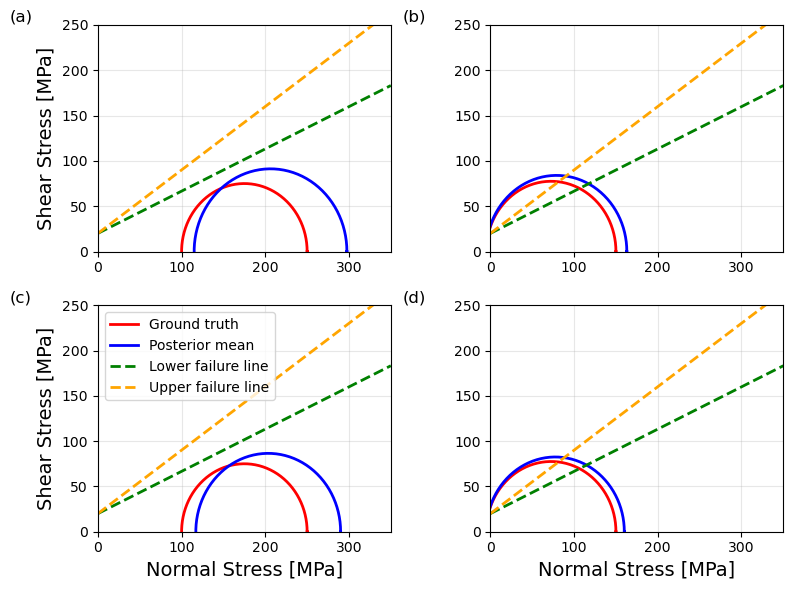

In [7]:
# Set up the figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

# Failure envelope parameters
cohesion = 20  # kPa
friction_angle_lower = 25  # degrees
friction_angle_upper = 35  # degrees

# Stress range for failure envelopes
sigma_range = np.linspace(0, 350, 100)

# Colors and styles
colors = {
    'ground_truth': 'red',
    'posterior_mean': 'blue',
    'lower_failure': 'green',
    'upper_failure': 'orange'
}

line_styles = {
    'ground_truth': '-',
    'posterior_mean': '-',
    'lower_failure': '--',
    'upper_failure': '--'
}

for i, (ax, scenario) in enumerate(zip(axes, scenarios)):
    # Create Mohr circles
    # Ground truth circle (red)
    x_gt, y_gt = create_mohr_circle(scenario['sigma1'], scenario['sigma3'])
    
    # Posterior mean circle (blue) - slightly smaller
    sigma1_post = posterior_mean[i]['sigma1'] 
    sigma3_post = posterior_mean[i]['sigma3']
    x_post, y_post = create_mohr_circle(sigma1_post, sigma3_post)
    
    # Plot circles
    ax.plot(x_gt, y_gt, color=colors['ground_truth'], 
            linewidth=2, label='Ground truth' if i == 2 else "")
    ax.plot(x_post, y_post, color=colors['posterior_mean'], 
            linewidth=2, label='Posterior mean' if i == 2 else "")
    
    # Create failure envelopes
    tau_lower = create_failure_envelope(sigma_range, cohesion, friction_angle_lower)
    tau_upper = create_failure_envelope(sigma_range, cohesion, friction_angle_upper)
    
    # Plot failure envelopes
    ax.plot(sigma_range, tau_lower, color=colors['lower_failure'], 
            linestyle=line_styles['lower_failure'], linewidth=2,
            label='Lower failure line' if i == 2 else "")
    ax.plot(sigma_range, tau_upper, color=colors['upper_failure'], 
            linestyle=line_styles['upper_failure'], linewidth=2,
            label='Upper failure line' if i == 2 else "")
    
    # Set axis properties
    ax.set_xlim(0, 350)
    ax.set_xticks([0, 100, 200, 300])
    ax.set_ylim(0, 250)
    ax.grid(True, alpha=0.3)
    #ax.set_title(scenario['title'], fontsize=12, fontweight='bold')
        # Add subplot labels (publication style)
    ax.text(-0.3, 1.00, scenario['title'], transform=ax.transAxes, 
            fontsize=12, verticalalignment='bottom')
    
    # Set axis labels only for bottom and left plots
    if i >= 2:  # Bottom row
        ax.set_xlabel('Normal Stress [MPa]', fontsize=14)
    if i % 2 == 0:  # Left column
        ax.set_ylabel('Shear Stress [MPa]', fontsize=14)
    
    # Add legend only to subplot (c)
    if i == 2:
        ax.legend(loc='upper left', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.savefig("bolfi_events_mohr_circle_paper_final.png", dpi=400)

In [8]:
scenarios = [
    {'sigma1': Data['ground_truth_unsaturated']['sigma1'], 'sigma3': Data['ground_truth_unsaturated']['sigma3'], 'title': '(a)'},
    {'sigma1': Data['ground_truth_saturated']['sigma1'], 'sigma3': Data['ground_truth_saturated']['sigma3'], 'title': '(b)'},
    {'sigma1': Data['ground_truth_unsaturated']['sigma1'], 'sigma3': Data['ground_truth_unsaturated']['sigma3'], 'title': '(c)'},
    {'sigma1': Data['ground_truth_saturated']['sigma1'], 'sigma3': Data['ground_truth_saturated']['sigma3'], 'title': '(d)'}
]


In [9]:
posterior_mean = [
    {'sigma1': Data['posterior_mean_unsaturated_potency_200']['sigma1'], 'sigma3': Data['posterior_mean_unsaturated_potency_200']['sigma3'], 'title': '(a)'},
    {'sigma1': Data['posterior_mean_saturated_potency_200']['sigma1'], 'sigma3': Data['posterior_mean_saturated_potency_200']['sigma3'], 'title': '(b)'},
    {'sigma1': Data['posterior_mean_unsaturated_potency_500']['sigma1'], 'sigma3': Data['posterior_mean_unsaturated_potency_500']['sigma3'], 'title': '(c)'},
    {'sigma1': Data['posterior_mean_saturated_potency_500']['sigma1'], 'sigma3': Data['posterior_mean_saturated_potency_500']['sigma3'], 'title': '(d)'}
]


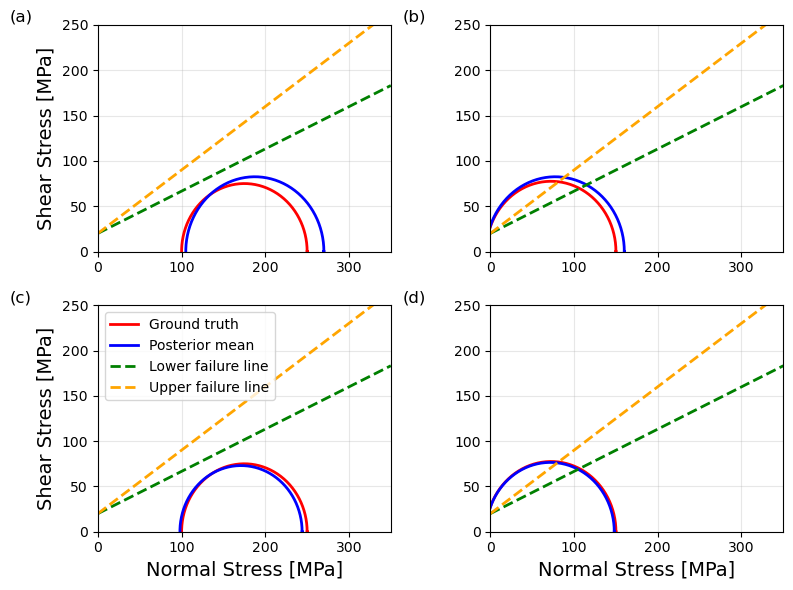

In [10]:
# Set up the figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()


# Failure envelope parameters
cohesion = 20  # kPa
friction_angle_lower = 25  # degrees
friction_angle_upper = 35  # degrees

# Stress range for failure envelopes
sigma_range = np.linspace(0, 350, 100)

# Colors and styles
colors = {
    'ground_truth': 'red',
    'posterior_mean': 'blue',
    'lower_failure': 'green',
    'upper_failure': 'orange'
}

line_styles = {
    'ground_truth': '-',
    'posterior_mean': '-',
    'lower_failure': '--',
    'upper_failure': '--'
}

for i, (ax, scenario) in enumerate(zip(axes, scenarios)):
    # Create Mohr circles
    # Ground truth circle (red)
    x_gt, y_gt = create_mohr_circle(scenario['sigma1'], scenario['sigma3'])
    
    # Posterior mean circle (blue) - slightly smaller
    sigma1_post = posterior_mean[i]['sigma1'] 
    sigma3_post = posterior_mean[i]['sigma3']
    x_post, y_post = create_mohr_circle(sigma1_post, sigma3_post)
    
    # Plot circles
    ax.plot(x_gt, y_gt, color=colors['ground_truth'], 
            linewidth=2, label='Ground truth' if i == 2 else "")
    ax.plot(x_post, y_post, color=colors['posterior_mean'], 
            linewidth=2, label='Posterior mean' if i == 2 else "")
    
    # Create failure envelopes
    tau_lower = create_failure_envelope(sigma_range, cohesion, friction_angle_lower)
    tau_upper = create_failure_envelope(sigma_range, cohesion, friction_angle_upper)
    
    # Plot failure envelopes
    ax.plot(sigma_range, tau_lower, color=colors['lower_failure'], 
            linestyle=line_styles['lower_failure'], linewidth=2,
            label='Lower failure line' if i == 2 else "")
    ax.plot(sigma_range, tau_upper, color=colors['upper_failure'], 
            linestyle=line_styles['upper_failure'], linewidth=2,
            label='Upper failure line' if i == 2 else "")
    
    # Set axis properties
    ax.set_xlim(0, 350)
    ax.set_xticks([0, 100, 200, 300])
    ax.set_ylim(0, 250)
    ax.grid(True, alpha=0.3)
    #ax.set_title(scenario['title'], fontsize=12, fontweight='bold')
        # Add subplot labels (publication style)
    ax.text(-0.3, 1.00, scenario['title'], transform=ax.transAxes, 
            fontsize=12, verticalalignment='bottom')
    
    # Set axis labels only for bottom and left plots
    if i >= 2:  # Bottom row
        ax.set_xlabel('Normal Stress [MPa]', fontsize=14)
    if i % 2 == 0:  # Left column
        ax.set_ylabel('Shear Stress [MPa]', fontsize=14)
    
    # Add legend only to subplot (c)
    if i == 2:
        ax.legend(loc='upper left', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.savefig("bolfi_potencies_mohr_circle_paper_final.png", dpi=400)